# Statistical regression of biodiversity data

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
!git clone https://github.com/amarmeddahi/sounds-of-nature.git

Cloning into 'sounds-of-nature'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 118 (delta 41), reused 71 (delta 14), pack-reused 0
Receiving objects: 100% (118/118), 33.25 MiB | 21.48 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [3]:
path_data = "./sounds-of-nature/data/latent_space_mel256_512.csv"

In [4]:
data = pd.read_csv(path_data)
joint_table = pd.read_csv("./sounds-of-nature/data/reg-ind_joint_table.csv")
regression = pd.read_csv("./sounds-of-nature/data/regression.csv")

## Cleaning the dataset

In [5]:
# Drop duplicate rows
data = data.drop_duplicates()

In [6]:
# Drop columns with high percentage of missing values
missing_threshold = 0.8
data = data.dropna(thresh=int(missing_threshold * len(data)), axis=1)

In [7]:
# Drop rows with missing values
data = data.dropna()

## Selecting the labels

In [8]:
X = data.iloc[:, 3:-1].values.astype(float)

In [9]:
y = []
for filename in data['filename']:
  id = joint_table.loc[joint_table['filename'] == filename, 'transect'].values[0]
  y.append(regression.loc[regression['id'] == id].values[0][1:])
y = np.array(y)

## Encoding the labels

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_idx = regression.columns.get_loc('TFV_G11_GROUP') - 1
y[:,cat_idx] = le.fit_transform(y[:,cat_idx])

In [11]:
# Print the categorical values and their corresponding integer values
print('Categorical values:', le.classes_)
print('Integer values:', le.transform(le.classes_))

Categorical values: ['Conifères' 'Feuillus' 'Mixte']
Integer values: [0 1 2]


## Splitting the dataset into the Training set and Test set

In [12]:
# Splitting randomy the dataset into the Training set and Test set (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the models

### Linear regression

In [13]:
# Linear regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

### Ridge regression

In [14]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

Ridge()

### Lasso regression

In [15]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+05, tolerance: 8.950e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.289e+06, tolerance: 9.884e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.758e+05, tolerance: 1.642e+03

Lasso(alpha=0.1)

### ElasticNet regression

In [16]:
# ElasticNet regression
from sklearn.linear_model import ElasticNet
elasticnet_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.243e+05, tolerance: 8.950e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.092e+01, tolerance: 2.352e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.768e+07, tolerance: 9.884e+03

ElasticNet(alpha=0.1)

### Decision tree regression

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Random forest regression

In [19]:
# Random forest regression
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

## Evaluating the model

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def evaluate_model(model, X_train, y_train, X_test, y_test):
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)
  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)
  return mse_train, mse_test, mae_train, mae_test

In [32]:
# Linear regression
linear_mse_train, linear_mse_test, linear_mae_train, linear_mae_test = evaluate_model(linear_regressor, X_train, y_train, X_test, y_test)

# Ridge regression
ridge_mse_train, ridge_mse_test, ridge_mae_train, ridge_mae_test = evaluate_model(ridge_regressor, X_train, y_train, X_test, y_test)

# Lasso regression
lasso_mse_train, lasso_mse_test, lasso_mae_train, lasso_mae_test = evaluate_model(lasso_regressor, X_train, y_train, X_test, y_test)

# ElasticNet regression
elastic_mse_train, elastic_mse_test, elastic_mae_train, elastic_mae_test = evaluate_model(elasticnet_regressor, X_train, y_train, X_test, y_test)

# Decision tree regression
tree_mse_train, tree_mse_test, tree_mae_train, tree_mae_test = evaluate_model(tree_regressor, X_train, y_train, X_test, y_test)

# Random forest regression
forest_mse_train, forest_mse_test, forest_mae_train, forest_mae_test = evaluate_model(forest_regressor, X_train, y_train, X_test, y_test)

In [33]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'Decision tree', 'Random forest']
mse_train = [linear_mse_train, ridge_mse_train, lasso_mse_train, elastic_mse_train, tree_mse_train, forest_mse_train]
mse_test = [linear_mse_test, ridge_mse_test, lasso_mse_test, elastic_mse_test, tree_mse_test, forest_mse_test]
mae_train = [linear_mae_train, ridge_mae_train, lasso_mae_train, elastic_mae_train, tree_mae_train, forest_mae_train]
mae_test = [linear_mae_test, ridge_mae_test, lasso_mae_test, elastic_mae_test, tree_mae_test, forest_mae_test]

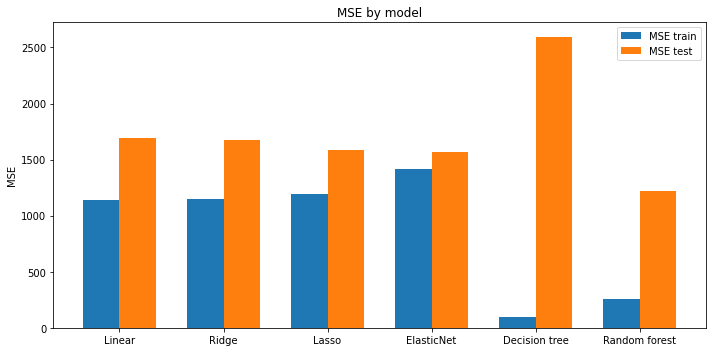

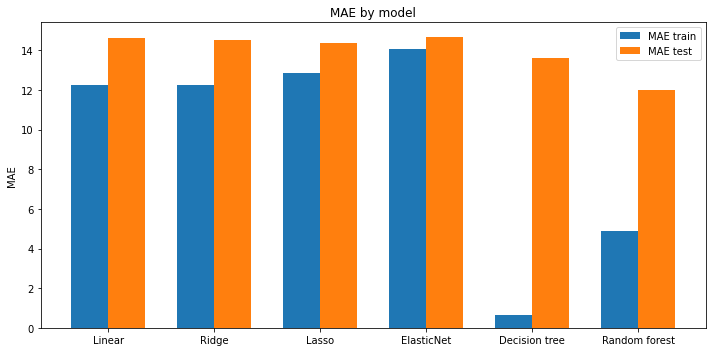

In [34]:
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, mse_train, width, label='MSE train')
rects2 = ax.bar(x + width/2, mse_test, width, label='MSE test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, mae_train, width, label='MAE train')
rects2 = ax.bar(x + width/2, mae_test, width, label='MAE test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE by model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()